# Predição de Preços de Casas utilizando Machine Learning e Scikit-learn

Para esse projeto vamos utilizar o "Callifornian Housing dataset", disponível no próprio sckit-learn

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing() #Carrega os dados diretamente do repositório do skleatn

print(housing.DESCR)
print(housing.feature_names)
print(housing.data[:5])
print(housing.target[:5])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Agora vamos separar o dataset em "features" e "lables", que vão ser utilizadas para realizar o treinamento e teste.

Os parâmetros test_size e random_state indicam:
- test_size = 0.2 : Indicam que 20% dos dados vão para teste, enquanto os outros 80% vão para treinamento
- O random_state define um valor fixo para a semente aleatória do gerador de números. Isso garante que a divisão dos dados sempre ocorra da mesma maneira toda vez que o código for executado.

In [7]:
from sklearn.model_selection import train_test_split
x = housing.data
y = housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

Para o Machine learning, será usado um modelo de RandomForestRegressor, por ter um histórico bom na questão de predição de preços.

##Como Funciona?
O RandomForestRegressor combina múltiplas árvores de decisão para criar um modelo mais robusto e reduzir overfitting.

1. Criação de múltiplas árvores de decisão: O modelo gera várias árvores de regressão, onde cada árvore recebe um conjunto aleatório de dados (bagging) e cada nó da árvore escolhe um subconjunto aleatório dos atributos para decidir os splits (Feature Randomness).
2. Predição pela média das árvores: Para prever cada valor, cada árvore gera uma estimativa, ai o resultado final é a média das predições de todas as árvores, tornando o modelo mais estável e preciso.

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo
regressor = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators = Número de árvores na floresta (padrão: 100). Quanto maior, melhor a generalização, mas aumenta o custo computacional.
regressor.fit(x_train, y_train)

#Fazendo as previsões
y_pred = regressor.predict(x_test)

Agora, iremos realizar a avaliação do nosso modelo de predição

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Avaliar desempenho
mse = mean_squared_error(y_test, y_pred)
print(f"Erro quadrático médio: {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Erro médio absoluto: {mae:.4f}")

rmse = np.sqrt(mse)
print(f"Raiz do erro quadrático médio: {rmse:.4f}")

Erro quadrático médio: 0.2554
Erro médio absoluto: 0.3275
Raiz do erro quadrático médio: 0.5053


##Gráficos para melhor visualização dos dados


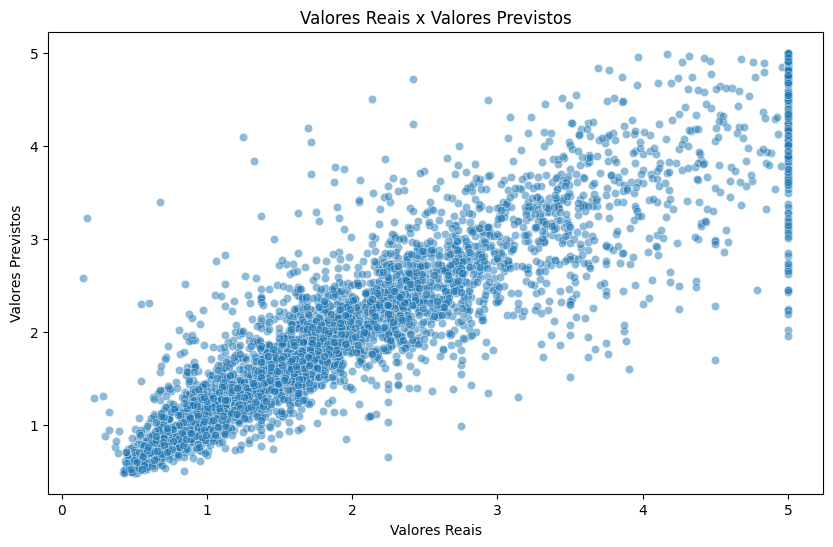

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5) #Pontos com 50% de transparência.

plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais x Valores Previstos")
plt.show()

Text(0, 0.5, 'Frequência')

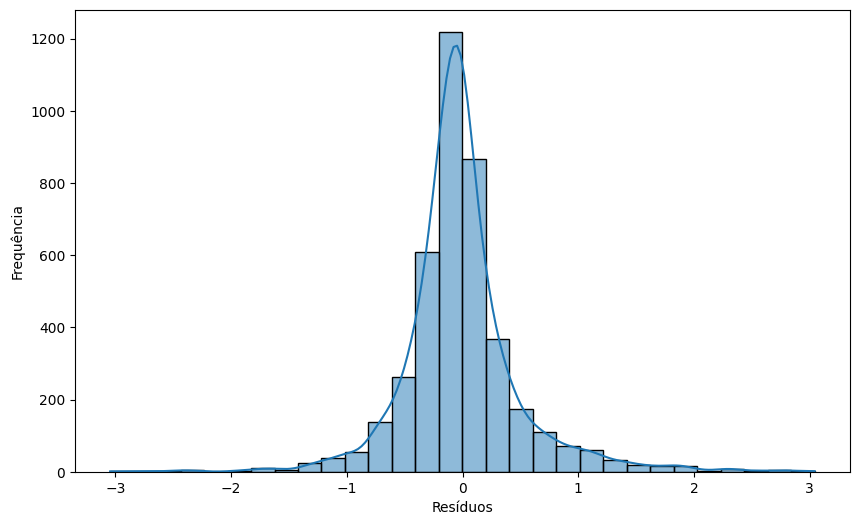

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Resíduos")
plt.ylabel("Frequência")